# 5장. 딥러닝에 필요한 최적화 이론

#### Scikit-Learn을 이용한 선형회귀

In [1]:
# training data
x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

# Scikit-Learn의 선형회귀 예제
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

print(reg.score(x_train,y_train))
print(reg.coef_)
print(reg.intercept_)
print(reg.predict([[5]]))

1.0
[[-1.]]
[1.]
[[-4.]]


#### TensorFlow를 이용한 선형회귀

In [2]:
# TensorFlow의 선형회귀 예제
import tensorflow as tf

# Model Parameter
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

@tf.function
def linear_model(x):
    return W * x + b

@tf.function
def loss(y,predict):
    return tf.reduce_sum(tf.square(y-predict))

# training data
x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

MaxIter = 1000
lr = 0.01

for i in range(MaxIter):
    with tf.GradientTape() as tape:
        current_loss = loss(y_train, linear_model(x_train))
        dw, db = tape.gradient(current_loss, [W, b])
        
        if i%100 == 0:
            print(i, W.numpy(), b.numpy(), current_loss.numpy())
        
        W.assign_sub(lr * dw)
        b.assign_sub(lr * db)

0 [0.3] [-0.3] 23.66
100 [-0.84079814] [0.53192717] 0.14636436
200 [-0.95227844] [0.8596927] 0.01315132
300 [-0.98569524] [0.9579423] 0.0011816786
400 [-0.99571204] [0.98739296] 0.000106178064
500 [-0.99871475] [0.99622124] 9.539404e-06
600 [-0.9996148] [0.9988674] 8.568733e-07
700 [-0.99988455] [0.99966055] 7.6948666e-08
800 [-0.99996537] [0.99989825] 6.908479e-09
900 [-0.99998957] [0.99996936] 6.2447114e-10


## 5.1 딥러닝에 나타나는 최적화 문제

#### 1. 모델 및 최적화 문제 정의 파트

In [3]:
import tensorflow as tf

# Model Parameter
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

@tf.function
def linear_model(x):
    return W * x + b

@tf.function
def loss(y,predict):
    return tf.reduce_sum(tf.square(y-predict))

# training data
x_train = [[1], [2], [3], [4]]
y_train = [[0], [-1], [-2], [-3]]

#### 2. 정의된 최적화 문제 풀이 파트

In [4]:
MaxIter = 1000
lr = 0.01

for i in range(MaxIter):
    with tf.GradientTape() as tape:
        current_loss = loss(y_train, linear_model(x_train))
        dw, db = tape.gradient(current_loss, [W, b])
        
        if i%100 == 0:
            print(i, W.numpy(), b.numpy(), current_loss.numpy())
        
        W.assign_sub(lr * dw)
        b.assign_sub(lr * db)

0 [0.3] [-0.3] 23.66
100 [-0.84079814] [0.53192717] 0.14636436
200 [-0.95227844] [0.8596927] 0.01315132
300 [-0.98569524] [0.9579423] 0.0011816786
400 [-0.99571204] [0.98739296] 0.000106178064
500 [-0.99871475] [0.99622124] 9.539404e-06
600 [-0.9996148] [0.9988674] 8.568733e-07
700 [-0.99988455] [0.99966055] 7.6948666e-08
800 [-0.99996537] [0.99989825] 6.908479e-09
900 [-0.99998957] [0.99996936] 6.2447114e-10


## 5.2 최적화 문제의 출발

#### 제곱값의 합을 이용한 선형 회귀

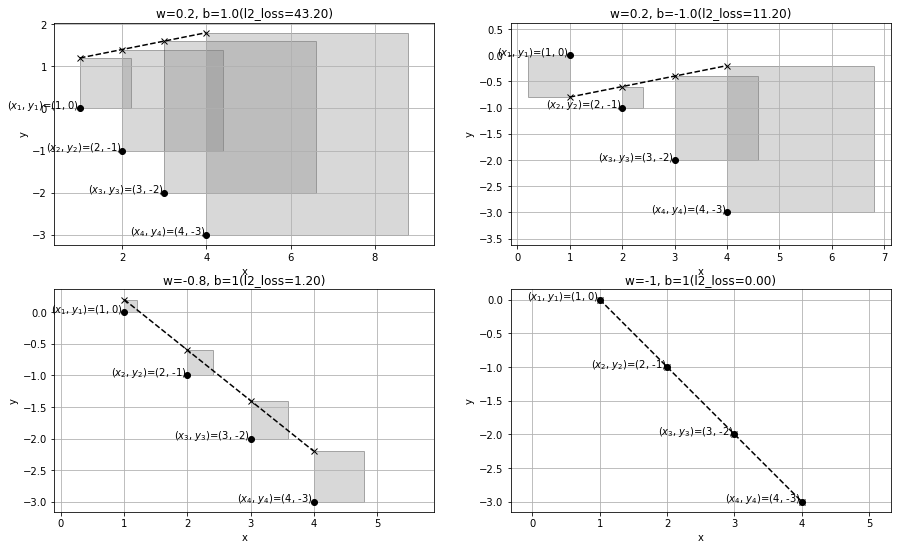

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def l2_loss(w,b,x,y):
    return np.sum(np.square(w*x + b - y))

def visualize_l2(w, b, x_train, y_train, loss):
    loss_name = loss.__name__
    plt.plot(x_train, y_train, 'ok')
    plt.plot(x_train, w * x_train + b, '--kx')
    [plt.text(x, y, '($x_{0}$, $y_{0}$)=({1}, {2}) '.format(k, x, y), horizontalalignment='right') for k, (x, y) in enumerate(zip(x_train, y_train),1)]
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle( (xx, yy), (w * xx + b - yy), (w * xx + b - yy), alpha=0.3, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("w={}, b={}({}={:1.2f})".format(w,b,loss_name,loss(w,b,x_train,y_train)))

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
visualize_l2(0.2, 1.0, x_train, y_train, l2_loss)
plt.subplot(2,2,2)
visualize_l2(0.2, -1.0, x_train, y_train, l2_loss)
plt.subplot(2,2,3)
visualize_l2(-0.8, 1, x_train, y_train, l2_loss)
plt.subplot(2,2,4)
visualize_l2(-1, 1, x_train, y_train, l2_loss)
plt.show(block=False)

#### 절댓값의 합을 사용한 선형 회귀

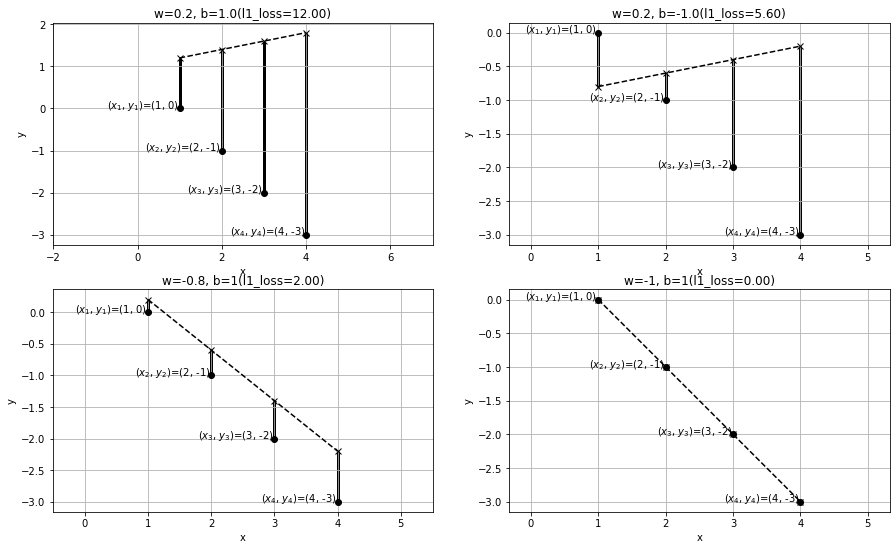

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def l1_loss(w,b,x,y):
    return np.sum(np.abs(w*x + b - y))

def visualize_l1(w, b, x_train, y_train, loss):
    loss_name = loss.__name__
    plt.plot(x_train, y_train, 'ok')
    plt.plot(x_train, w * x_train + b, '--kx')
    [plt.text(x, y, '($x_{0}$, $y_{0}$)=({1}, {2}) '.format(k, x, y),horizontalalignment='right') for k, (x, y) in enumerate(zip(x_train, y_train),1)] 
    currentAxis = plt.gca()

    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 0, w * xx + b - yy, alpha=1.0, facecolor='k', edgecolor='k', linewidth=3))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("w={}, b={}({}={:1.2f})".format(w,b,loss_name,loss(w,b,x_train,y_train)))

x_train = np.array([1, 2, 3, 4])
y_train = np.array([0, -1, -2, -3])

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
visualize_l1(0.2, 1.0, x_train, y_train, l1_loss)
plt.subplot(2,2,2)
visualize_l1(0.2, -1.0, x_train, y_train, l1_loss)
plt.subplot(2,2,3)
visualize_l1(-0.8, 1, x_train, y_train, l1_loss)
plt.subplot(2,2,4)
visualize_l1(-1, 1, x_train, y_train, l1_loss)
plt.show(block=False)